# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "QRILC"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'QRILC',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.415  1  0.739 0.391 0.004   
                             age        0.028  1  0.050 0.824 0.000   
                             Kiel       1.823  1  3.248 0.073 0.017   
                             Magdeburg  5.094  1  9.075 0.003 0.045   
                             Sweden     8.422  1 15.001 0.000 0.073   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.001  1  0.001 0.980 0.000   
                             age        2.334  1  2.263 0.134 0.012   
                             Kiel       0.000  1  0.000 0.997 0.000   
                             Magdeburg  2.518  1  2.441 0.120 0.013   
                             Sweden    22.256  1 21.580 0.000 0.102   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.408  0.554    False  
                             age               0.084  0.895    False  
                             Kiel              1.136  0.163    False  
                             Magdeburg         2.531  0.012     True  
                             Sweden            3.831  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.009  0.990    False  
                             age               0.872  0.258    False  
                             Kiel              0.001  0.998    False  
                             Magdeburg         0.921  0.238    False  
                             Sweden            5.200  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                   QRILC                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.652  1  4.080 0.045 0.021   
                             age        0.023  1  0.142 0.706 0.001   
                             Kiel       0.465  1  2.908 0.090 0.015   
                             Magdeburg  0.968  1  6.056 0.015 0.031   
                             Sweden     2.522  1 15.780 0.000 0.076   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         3.518  1  2.103 0.149 0.011   
                             age        0.635  1  0.380 0.538 0.002   
                             Kiel       7.329  1  4.381 0.038 0.022   
                             Magdeburg 15.728  1  9.402 0.002 0.047   
                             Sweden     0.099  1  0.059 0.808 0.000   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                1.349  0.104    False  
                             age               0.151  0.805    False  
                             Kiel              1.047  0.180    False  
                             Magdeburg         1.831  0.043     True  
                             Sweden            3.997  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.828  0.266    False  
                             age               0.269  0.670    False  
                             Kiel              1.424  0.091    False  
                             Magdeburg         2.605  0.010     True  
                             Sweden            0.093  0.879    False  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.391         0.408  0.554    False   
                             Kiel      0.073         1.136  0.163    False   
                             Magdeburg 0.003         2.531  0.012     True   
                             Sweden    0.000         3.831  0.001     True   
                             age       0.824         0.084  0.895    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.980         0.009  0.990    False   
                             Kiel      0.997         0.001  0.998    False   
                             Magdeburg 0.120         0.921  0.238    False   
                             Sweden    0.000         5.200  0.000     True   
                             age       0.134         0.872  0.258    False   

model                                  QRILC                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.045         1.349  0.104    False  
                             Kiel      0.090         1.047  0.180    False  
                             Magdeburg 0.015         1.831  0.043     True  
                             Sweden    0.000         3.997  0.001     True  
                             age       0.706         0.151  0.805    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.149         0.828  0.266    False  
                             Kiel      0.038         1.424  0.091    False  
                             Magdeburg 0.002         2.605  0.010     True  
                             Sweden    0.808         0.093  0.879    False  
                             age       0.538         0.269  0.670    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'QRILC': 'QRILC'}

## Describe scores

In [10]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.497     0.335     0.245         2.744     0.312
std       0.303         5.361     0.331     0.299         5.171     0.326
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.332     0.014     0.002         0.363     0.008
50%       0.116         0.934     0.233     0.093         1.033     0.185
75%       0.466         2.446     0.621     0.434         2.710     0.578
max       0.999       147.166     0.999     1.000        84.753     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_50980/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.391         0.408   
A0A024R0T9;K7ER74;P02655                           AD     0.057         1.246   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.063         1.202   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.648         0.189   
A0A075B6H7                                         AD     0.149         0.828   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.076         1.121   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.861         0.065   
S4R3U6                                             AD     0.980         0.009   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.554    False   
A0A024R0T9;K7ER74;P02655                           AD      0.134    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.145    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.769    False   
A0A075B6H7                                         AD      0.278    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.313    False   
Q9Y6X5                                             AD      0.167    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.919    False   
S4R3U6                                             AD      0.990    False   

model                                                     QRILC                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.045         1.349   
A0A024R0T9;K7ER74;P02655                           AD     0.029         1.543   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.139         0.858   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.307         0.513   
A0A075B6H7                                         AD     0.162         0.790   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.066         1.178   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.597         0.224   
S4R3U6                                             AD     0.149         0.828   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.104    False  
A0A024R0T9;K7ER74;P02655                           AD      0.073    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.253    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.455    False  
A0A075B6H7                                         AD      0.283    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                             QRILC                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.253         1.418     0.333     0.241         1.497     0.314
std       0.294         1.665     0.320     0.285         1.769     0.310
min       0.000         0.002     0.000     0.000         0.001     0.000
25%       0.011         0.348     0.037     0.010         0.380     0.030
50%       0.115         0.939     0.231     0.104         0.985     0.202
75%       0.449         1.951     0.607     0.417         2.010     0.563
max       0.996        24.742     0.998     0.998        24.191     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,QRILC
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1023,1008


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.391         0.408  0.554   
A0A024R0T9;K7ER74;P02655                           0.057         1.246  0.134   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.063         1.202  0.145   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.648         0.189  0.769   
A0A075B6H7                                         0.149         0.828  0.278   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.313   
Q9Y6X5                                             0.076         1.121  0.167   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.861         0.065  0.919   
S4R3U6                                             0.980         0.009  0.990   

                                                            QRILC  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.045   
A0A024R0T9;K7ER74;P02655                              False 0.029   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.139   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.307   
A0A075B6H7                                            False 0.162   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.066   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.597   
S4R3U6                                                False 0.149   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               1.349  0.104   
A0A024R0T9;K7ER74;P02655                                   1.543  0.073   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.858  0.253   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.513  0.455   
A0A075B6H7                                                 0.790  0.283   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.302   
Q9Y6X5                                                     1.178  0.143   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.171   
Q9Y6Y9                                                     0.224  0.718   
S4R3U6                                                     0.828  0.266   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - QRILC (no)    962
PI (yes) - QRILC (yes)   352
PI (no)  - QRILC (yes)    61
PI (yes) - QRILC (no)     46
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_50980/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                               QRILC                \
                  p-unc -Log10 pvalue qvalue rejected p-unc -Log10 pvalue   
protein groups                                                              
A0A075B6I0        0.018         1.751  0.054    False 0.002         2.650   
A0A075B6J9        0.095         1.021  0.200    False 0.009         2.038   
A0A087WWT2;Q9NPD7 0.019         1.712  0.058    False 0.004         2.424   
A0A087WXB8;Q9Y274 0.015         1.822  0.047     True 0.050         1.297   
A0A087X0M8        0.019         1.721  0.057    False 0.003         2.525   
...                 ...           ...    ...      ...   ...           ...   
Q9NYX4            0.051         1.295  0.122    False 0.007         2.130   
Q9NZR2            0.016         1.800  0.049     True 0.031         1.506   
Q9ULP0-3;Q9ULP0-6 0.036         1.443  0.093    False 0.003         2.558   
Q9UNW1            0.009         2.030  0.032     True 0.108         0.968   
Q9UQ52            0.149         0.826  0.279    False 0.003         2.463   

                                       data  
                  qvalue rejected frequency  
protein groups                               
A0A075B6I0         0.009     True       194  
A0A075B6J9         0.029     True       156  
A0A087WWT2;Q9NPD7  0.014     True       193  
A0A087WXB8;Q9Y274  0.115    False        89  
A0A087X0M8         0.011     True       189  
...                  ...      ...       ...  
Q9NYX4             0.024     True       195  
Q9NZR2             0.079    False       145  
Q9ULP0-3;Q9ULP0-6  0.011     True       136  
Q9UNW1             0.209    False       171  
Q9UQ52             0.013     True       188  

[107 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,QRILC,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.554,0.104,186,PI (no) - QRILC (no)
A0A024R0T9;K7ER74;P02655,0.134,0.073,195,PI (no) - QRILC (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.145,0.253,174,PI (no) - QRILC (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.769,0.455,196,PI (no) - QRILC (no)
A0A075B6H7,0.278,0.283,91,PI (no) - QRILC (no)
...,...,...,...,...
Q9Y6R7,0.313,0.302,197,PI (no) - QRILC (no)
Q9Y6X5,0.167,0.143,173,PI (no) - QRILC (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.171,197,PI (no) - QRILC (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,QRILC,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
J3KSJ8;Q9UD71;Q9UD71-2,0.831,0.020,51,PI (no) - QRILC (yes),0.811
Q14517,0.033,0.793,53,PI (yes) - QRILC (no),0.760
Q2UY09,0.049,0.731,50,PI (yes) - QRILC (no),0.682
E7EN89;E9PP67;E9PQ25;F2Z2Y8;Q9H0E2;Q9H0E2-2,0.661,0.010,86,PI (no) - QRILC (yes),0.651
K7EPJ5;O60291;O60291-2;O60291-3;O60291-4,0.018,0.599,50,PI (yes) - QRILC (no),0.581
...,...,...,...,...,...
Q6P9A2,0.044,0.056,168,PI (yes) - QRILC (no),0.011
Q16620;Q16620-2;Q16620-3;Q16620-4;Q16620-5;Q16620-6,0.054,0.048,126,PI (no) - QRILC (yes),0.006
O95450;O95450-2,0.050,0.055,170,PI (yes) - QRILC (no),0.005


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_1_QRILC


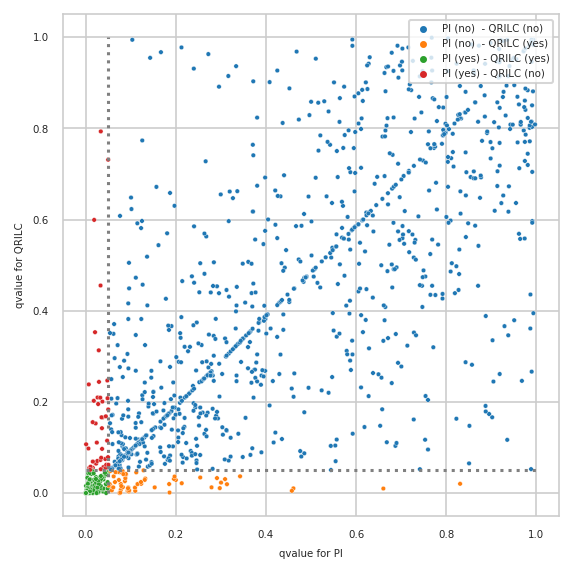

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_QRILC/diff_analysis_comparision_2_QRILC


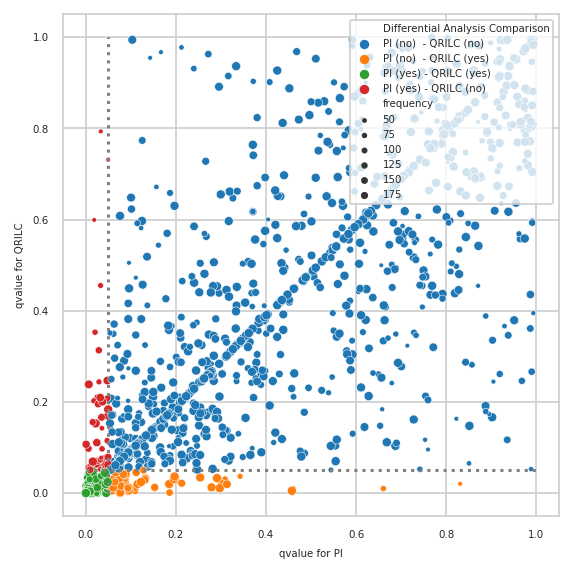

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APP,ENSP00000284981,5.000
APOE,ENSP00000252486,5.000
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
MAPT,ENSP00000340820,4.800
...,...,...
LPIN3,ENSP00000487971,0.681
HECTD1,ENSP00000382269,0.681
ETNK1,ENSP00000500633,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/9315d83d47168fa3da1739d7e683ad72_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out